In [1]:
import pandas as pd
import numpy as np
import xarray
import os
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_albedo = r"D:/MasterThesis/Data/albedo_data/"
path_optical = r"D:/MasterThesis/Data/optical-rs/unzipped/"
out_path = r"../../"

Read all albedo files and add mask to filter out everything <= 0.565 which corresponds to ice

In [3]:
df_albedo = pd.DataFrame()

# read in all files in albedo_data folder with xarray (June, July and August of 2019) 
for file in os.listdir(path_albedo):

    print(file)

    df_temp = xarray.open_dataset(path_albedo + file).to_dataframe().reset_index()
    df_temp.rename(columns={"band_data": file[:10]}, inplace=True)
    df_albedo = pd.concat([df_albedo, df_temp[[file[:10]]]], axis=1)

2019-06-10_albedo_bb_planar_sw.tif
2019-06-11_albedo_bb_planar_sw.tif
2019-06-12_albedo_bb_planar_sw.tif
2019-06-13_albedo_bb_planar_sw.tif
2019-06-14_albedo_bb_planar_sw.tif
2019-06-15_albedo_bb_planar_sw.tif
2019-06-16_albedo_bb_planar_sw.tif
2019-06-17_albedo_bb_planar_sw.tif
2019-06-18_albedo_bb_planar_sw.tif
2019-06-19_albedo_bb_planar_sw.tif
2019-06-20_albedo_bb_planar_sw.tif
2019-06-21_albedo_bb_planar_sw.tif
2019-06-22_albedo_bb_planar_sw.tif
2019-06-23_albedo_bb_planar_sw.tif
2019-06-24_albedo_bb_planar_sw.tif
2019-06-25_albedo_bb_planar_sw.tif
2019-06-26_albedo_bb_planar_sw.tif
2019-06-27_albedo_bb_planar_sw.tif
2019-06-28_albedo_bb_planar_sw.tif
2019-06-29_albedo_bb_planar_sw.tif
2019-06-30_albedo_bb_planar_sw.tif
2019-07-01_albedo_bb_planar_sw.tif
2019-07-02_albedo_bb_planar_sw.tif
2019-07-03_albedo_bb_planar_sw.tif
2019-07-04_albedo_bb_planar_sw.tif
2019-07-05_albedo_bb_planar_sw.tif
2019-07-06_albedo_bb_planar_sw.tif
2019-07-07_albedo_bb_planar_sw.tif
2019-07-08_albedo_bb

In [4]:
# apply mask of >= 0.565 to each column
df_albedo_mask = df_albedo.mask(df_albedo <= 0.565)

# create dictionary of column names and indices where values are not NaNs
df_albedo_mask_dict = {col: df_albedo_mask[col].dropna().index for col in df_albedo_mask.columns}

del df_albedo, df_albedo_mask, df_temp

In [5]:
# df to keep all optical values in a row
optical_values = []

# read in the optical data of June, August and July of 2019
for month in ["06", "07", "08"]:
    for day in range(1, 32):
        date = f"2019-{month}-{day:02d}"

        try:
        
            # read in the data
            path = f"{path_optical}{date}_grain_diameter.tif"
            file = xarray.open_dataarray(path).to_dataframe().reset_index()
            # rename column band_data to date
            file = file.rename(columns={"band_data": date})
            try:
                # apply mask of df_albedo_mask_dict to date column if albedo data exists for that date
                file[date] = file[date].mask(file.index.isin(df_albedo_mask_dict[date]))
                print(date)
            except KeyError:
                print(f"KeyError: {date} not in df_albedo_mask_dict")
                continue
            
            # concat date column to optical dataframe on axis = 1
            optical_values.append(file[date].dropna().tolist())

        except:
            print(f"FileNotFoundError: {path} not found")
            pass

del file

# flatten list
optical_values = [item for sublist in optical_values for item in sublist]

FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-01_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-02_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-03_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-04_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-05_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-06_grain_diameter.tif not found
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-07_grain_diameter.tif not found
KeyError: 2019-06-08 not in df_albedo_mask_dict
FileNotFoundError: ../../Data/optical-rs/unzipped/2019-06-09_grain_diameter.tif not found
2019-06-10
2019-06-11
2019-06-12
2019-06-13
2019-06-14
2019-06-15
2019-06-16
2019-06-17
2019-06-18
2019-06-19
2019-06-20
2019-06-21
2019-06-22
2019-06-23
2019-06-24
2019-06-25
2019-06-26
2019-06-27
2019-06-28
2019-06-29
2019-06-30
F

<AxesSubplot: ylabel='Density'>

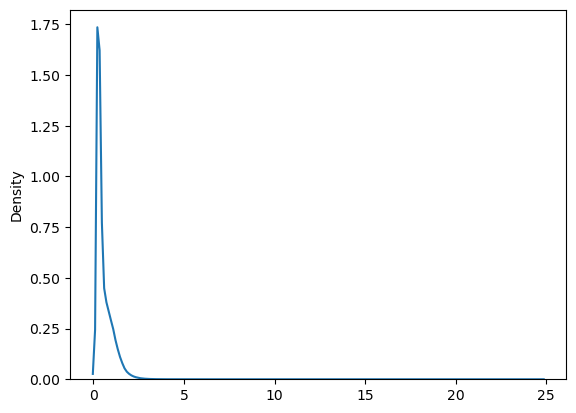

In [ ]:
# create a distribution density plot
sns.kdeplot(optical_values)

In [16]:
optical_values = pd.read_csv("D:/MasterThesis/Data/optical-rs/optical_values.csv")

In [17]:
optical_values

,optical_values
0,0.319352
1,0.453551
2,0.252538
3,0.320762
4,0.207398
...,...
65094977,0.005279
65094978,0.001881
65094979,0.003957
65094980,0.002694


In [12]:
optical_values_copy

""
optical_values
0.319352
0.453551
0.252538
0.320762
0.207398
...
0.005279
0.001881
0.003957


In [36]:
# create copy of optical_values and remove everything below 2
optical_values_copy = optical_values.copy()
# only keep values above 2
optical_values_copy = optical_values_copy[optical_values_copy["optical_values"] >= 2]

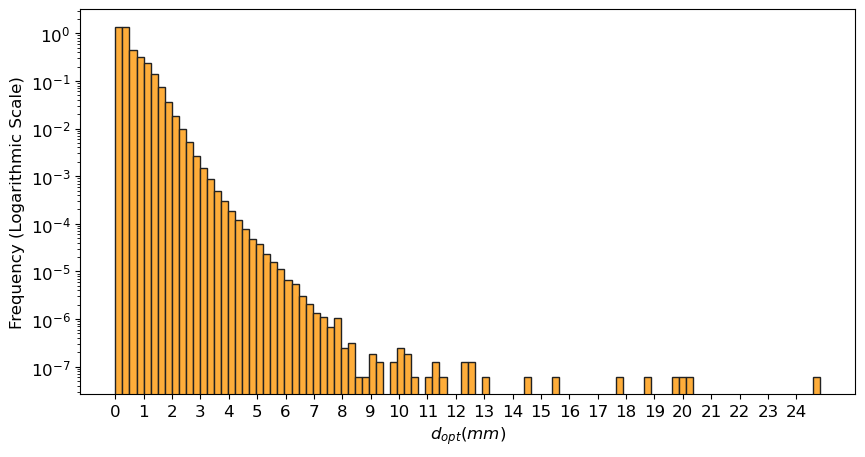

In [68]:
# create histogram with 100 bins and size of plot as wide as screen
plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, 25, 1))
plt.hist(optical_values, bins=100, color="#fead3a", edgecolor="#222222", linewidth=1, density=True)

### LABEL SETTINGS ###
plt.xlabel("$d_{opt} (mm)$", fontsize=12)
plt.ylabel("Frequency (Logarithmic Scale)", fontsize=12)
# set tick size to 12
plt.tick_params(axis='both', which='major', labelsize=12)
# make the y-axis logarithmic
plt.yscale("log")

plt.show()

**We decide to cap values above a snow grain diameter of 5mm to 5.**

In [ ]:
# store optical values as df to save time in future
df = pd.DataFrame(optical_values, columns=["optical_values"])
df.to_csv("optical_values.csv", index=False)